<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [7]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **Math for 4th grade**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [8]:
len(df.YEAR.unique())

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [527]:
# Group by state and corresponding average math 4 scores
df_temp = df.groupby('STATE')['AVG_MATH_4_SCORE'].mean()
print(df_temp['MICHIGAN'])
print(df_temp['OHIO'])
print('Ohio has higher average outcome score across all years for Math at Grade 4')

234.36363636363637
239.45454545454547
Ohio has higher average outcome score across all years for Math at Grade 4


Find the average for your outcome score across all states in 2019

In [528]:
# Find the mean math grade 4 score for all states combined
df_temp = df.groupby('STATE')['AVG_MATH_4_SCORE'].mean()
print(df_temp.mean())

236.45143305331985


Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [529]:
df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [530]:
# The percentage of money spent on instruction and capital 
df["RATE_OF_INSTRUCTION_AND_CAPITAL_EXPENDITURE_PER_REVENUE"] = (df['INSTRUCTION_EXPENDITURE'] + df['CAPITAL_OUTLAY_EXPENDITURE']) / (df['FEDERAL_REVENUE'] + df['STATE_REVENUE'] + df['LOCAL_REVENUE']) 

# Per student instruction expenditure
df['PER_STUDENT_INSTRUCTION_EXPENDITURE'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']


Final feature list: 
RATE_OF_INSTRUCTION_AND_CAPITAL_EXPENDITURE_PER_REVENUE
PER_STUDENT_INSTRUCTION_EXPENDITURE

Feature selection justification: 
    I wonder whether the percentage of income spent by the local government on education has an impact on 4th graders' math test results. Since this is not a nominal value and is just a rate, there may be problems establishing an association. Still, intuitively one would argue as the percentage increases, test scores increases.
    Another important aspect is per student instruction expenditure. More expenses per student may mean more teachers (thus, smaller classes) so, I suspect there would be a positive association between this and 4th grader math scores. That's why I chose this variable.


<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='RATE_OF_INSTRUCTION_AND_CAPITAL_EXPENDITURE_PER_REVENUE', ylabel='AVG_MATH_4_SCORE'>

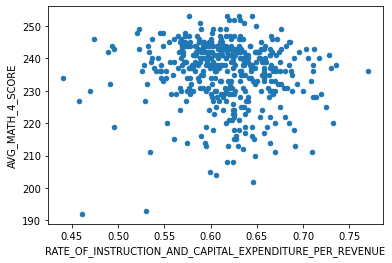

In [531]:
df.plot.scatter(x='RATE_OF_INSTRUCTION_AND_CAPITAL_EXPENDITURE_PER_REVENUE', y='AVG_MATH_4_SCORE')

(Rate of Instruction and Capital Expenditure Per Revenue vs. Average Math 4 Score)

# No clear relationship is seen here. Although it's worth noticing that states spending less % of their revenues on education sometimes perform as good as (sometimes even better) than those spending more % of their revenues on education.

**Visualization 2**

<AxesSubplot:xlabel='PER_STUDENT_INSTRUCTION_EXPENDITURE', ylabel='AVG_MATH_4_SCORE'>

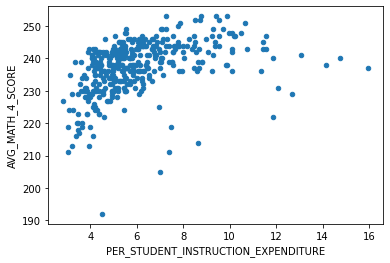

In [532]:
df.plot.scatter(x='PER_STUDENT_INSTRUCTION_EXPENDITURE', y='AVG_MATH_4_SCORE')

Per Student Instruction Expenditure vs. Average Math 4 Score

# This is interesting because it displays law of diminishing returns for money
# spent on instruction. Every additional dollar spent provides less value as
# deduced from the test scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [533]:
from sklearn.model_selection import train_test_split

In [535]:
X = df[['RATE_OF_INSTRUCTION_AND_CAPITAL_EXPENDITURE_PER_REVENUE','PER_STUDENT_INSTRUCTION_EXPENDITURE','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [537]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: REGRESSION

In [538]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [539]:
# quickly visualize results
col_name = 'PER-STUDENT-INSTRUCTION-EXPENDITURE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),100)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 8 score')

KeyError: 'PER-STUDENT-INSTRUCTION-EXPENDITURE'

In [516]:
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [515]:

y_pred = model.predict(X_test)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [278]:
# FOR CLASSIFICATION ONLY:

# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'PER_STUDENT_INSTRUCTION_EXPENDITURE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(6,))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),100)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')

<h2> Summary </h2>

# I had problem completing the last regression section because of an error: Input contains NaN, infinity or a value too large for dtype('float64'). I spent hours trying to fix it but it didn't work so I am including this here.

# However, I suspect that the Machine Learning algorithm is probably accurate for per student instruction expenditure, whereas it isn't really accurate for the rate of instruction and capital expenses per revenue value. This can also be viewed in the graphs. I used these two variables because I intuitively believed they could yield good results(association). To predict student success, year and per student instruction expenditure variables can be used. There seems to be diminishing marginal returns with increases in per student expenditure.

